# Explorator Dataset Analysis

In [37]:
# Common
import numpy as np
import re
import tensorflow as tf
import pickle
import string

# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Data collection
import pandas as pd

# Data/Result visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [9]:
data_df = pd.read_csv("./datasets/emails.csv")

# Preview of training data sample
data_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


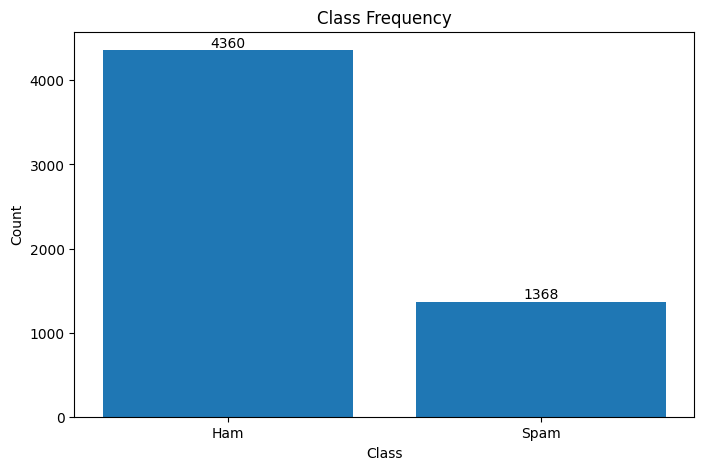

In [26]:
class_counts = data_df['spam'].value_counts()

plt.figure(figsize=(8,5))
plt.bar(['Ham', 'Spam'], class_counts.values)
plt.title("Class Frequency")
plt.xlabel('Class')
plt.ylabel('Count')

# Adding text annotations for each bar
for i, count in enumerate(class_counts.values):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

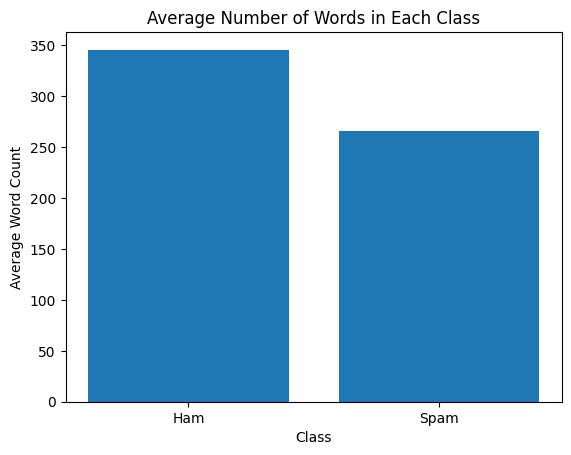

In [25]:
# Adding a new column for the number of words in each text
data_df['Word Count'] = data_df['text'].apply(lambda x: len(x.split()))

# Calculating the average number of words for each class
average_word_count = data_df.groupby('spam')['Word Count'].mean().sort_index()

# Plotting the average word count for each class
plt.bar(['Ham', 'Spam'], average_word_count.values)
plt.xlabel('Class')
plt.ylabel('Average Word Count')
plt.title('Average Number of Words in Each Class')
plt.show()

In [38]:
# Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    
    # Remove numbers and punctuation
    tokens = [token for token in tokens if token.isalpha() and token not in string.punctuation]
    
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(tokens)


In [39]:
# Preprocess the training and testing datasets
data_df['preprocessed_text'] = data_df['text'].apply(preprocess_text)

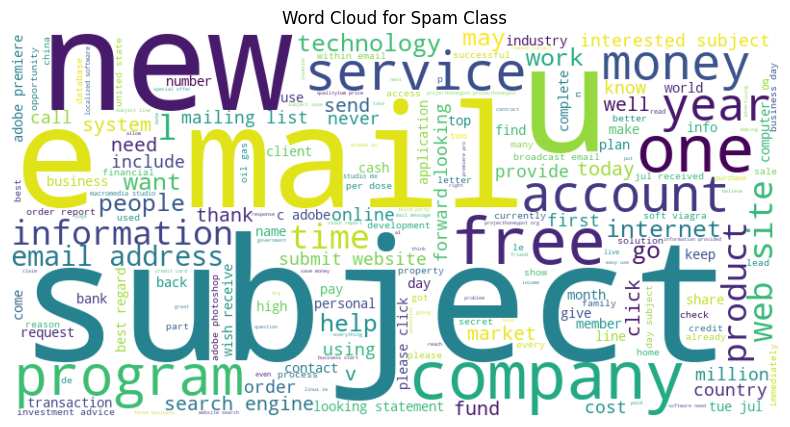

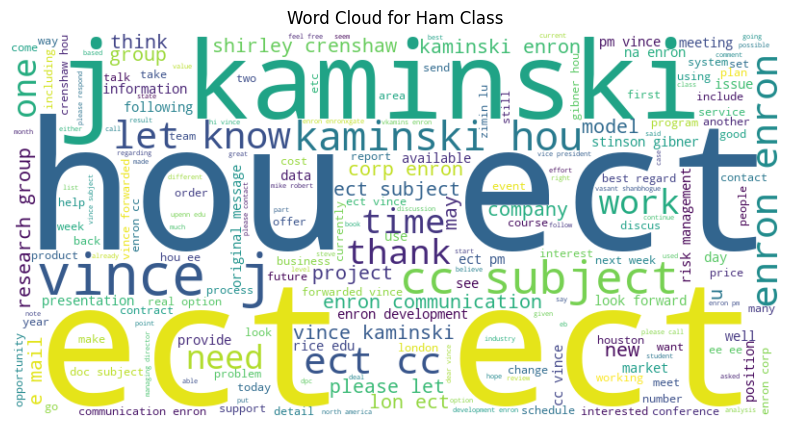

In [40]:
# Visualize the most common words in the dataset
def plot_wordcloud(label, text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {label} Class')
    plt.axis('off')
    plt.show()

# Create a word cloud for disaster tweets
spam_emails = data_df[data_df['spam'] == 1]['preprocessed_text'].str.cat(sep=' ')
plot_wordcloud('Spam', spam_emails)

# Create a word cloud for non-disaster tweets
ham_emails = data_df[data_df['spam'] == 0]['preprocessed_text'].str.cat(sep=' ')
plot_wordcloud('Ham', ham_emails)